In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5052 - acc: 0.7817 - val_loss: 0.3770 - val_acc: 0.8615
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2973 - acc: 0.9005 - val_loss: 0.3095 - val_acc: 0.8805
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2180 - acc: 0.9275 - val_loss: 0.2792 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1714 - acc: 0.9437 - val_loss: 0.2851 - val_acc: 0.8853
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1386 - acc: 0.9557 - val_loss: 0.2975 - val_acc: 0.8824
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1159 - acc: 0.9629 - val_loss: 0.2971 - val_acc: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0954 - acc: 0.9710 - val_loss: 0.3136 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0779 - a

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

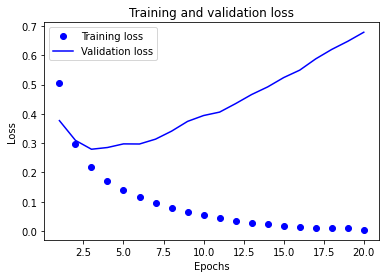

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

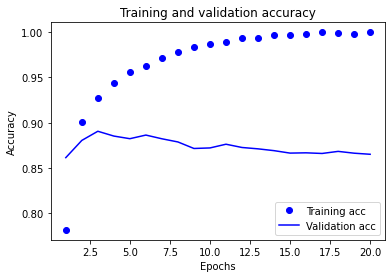

In [19]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 18ms/step - loss: 0.5381 - acc: 0.7754 - val_loss: 0.4241 - val_acc: 0.8653
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.3332 - acc: 0.8991 - val_loss: 0.3228 - val_acc: 0.8861
Epoch 3/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2400 - acc: 0.9253 - val_loss: 0.2886 - val_acc: 0.8888
Epoch 4/4
30/30 [==============================] - 0s 11ms/step - loss: 0.1883 - acc: 0.9385 - val_loss: 0.2845 - val_acc: 0.8883


In [21]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 923us/step - loss: 0.3056 - acc: 0.8751


In [22]:
results

[0.3056171238422394, 0.8750799894332886]

In [23]:
model.predict(x_test)

array([[0.21858451],
       [0.99278647],
       [0.70095956],
       ...,
       [0.06244922],
       [0.12215805],
       [0.42770034]], dtype=float32)

Further experiments

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 19ms/step - loss: 0.4903 - acc: 0.8023 - val_loss: 0.3953 - val_acc: 0.8503
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.3090 - acc: 0.9059 - val_loss: 0.3167 - val_acc: 0.8830
Epoch 3/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2379 - acc: 0.9284 - val_loss: 0.2966 - val_acc: 0.8818
Epoch 4/4
782/782 [==============================] - 1s 903us/step - loss: 0.2925 - acc: 0.8845


[0.29246824979782104, 0.8845199942588806]

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 16ms/step - loss: 0.5261 - acc: 0.7740 - val_loss: 0.3890 - val_acc: 0.8489
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2922 - acc: 0.9019 - val_loss: 0.2916 - val_acc: 0.8868
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2100 - acc: 0.9279 - val_loss: 0.2824 - val_acc: 0.8872
Epoch 4/4
782/782 [==============================] - 1s 903us/step - loss: 0.3050 - acc: 0.8784


[0.3049677014350891, 0.8783599734306335]

In [26]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 15ms/step - loss: 0.5549 - acc: 0.7831 - val_loss: 0.4736 - val_acc: 0.8145
Epoch 2/4
30/30 [==============================] - 0s 10ms/step - loss: 0.3853 - acc: 0.8865 - val_loss: 0.3709 - val_acc: 0.8709
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2941 - acc: 0.9098 - val_loss: 0.3244 - val_acc: 0.8750
Epoch 4/4
782/782 [==============================] - 1s 876us/step - loss: 0.3048 - acc: 0.8810


[0.30480077862739563, 0.8809599876403809]

In [27]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 17ms/step - loss: 0.4804 - acc: 0.7852 - val_loss: 0.3408 - val_acc: 0.8766
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2647 - acc: 0.9104 - val_loss: 0.2857 - val_acc: 0.8895
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.1949 - acc: 0.9310 - val_loss: 0.2736 - val_acc: 0.8910
Epoch 4/4
782/782 [==============================] - 1s 891us/step - loss: 0.3051 - acc: 0.8787


[0.30511170625686646, 0.8787199854850769]

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.4901 - acc: 0.7595 - val_loss: 0.3697 - val_acc: 0.8509
Epoch 2/4
30/30 [==============================] - 1s 17ms/step - loss: 0.2620 - acc: 0.9012 - val_loss: 0.2954 - val_acc: 0.8815
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1874 - acc: 0.9326 - val_loss: 0.3353 - val_acc: 0.8704
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.5049 - acc: 0.8120


[0.5048589110374451, 0.8120399713516235]

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 16ms/step - loss: 0.5104 - acc: 0.7845 - val_loss: 0.3697 - val_acc: 0.8739
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2875 - acc: 0.9043 - val_loss: 0.2913 - val_acc: 0.8881
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2114 - acc: 0.9269 - val_loss: 0.2920 - val_acc: 0.8837
Epoch 4/4
782/782 [==============================] - 1s 949us/step - loss: 0.2970 - acc: 0.8808


[0.2969784438610077, 0.880840003490448]

In [30]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 15ms/step - loss: 0.5644 - acc: 0.7689 - val_loss: 0.4574 - val_acc: 0.8572
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3712 - acc: 0.8900 - val_loss: 0.3489 - val_acc: 0.8775
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2723 - acc: 0.9157 - val_loss: 0.2982 - val_acc: 0.8888
Epoch 4/4
782/782 [==============================] - 1s 942us/step - loss: 0.2932 - acc: 0.8842


[0.2932053804397583, 0.8842399716377258]

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 16ms/step - loss: 0.1741 - acc: 0.7722 - val_loss: 0.1192 - val_acc: 0.8725
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.0926 - acc: 0.9042 - val_loss: 0.0934 - val_acc: 0.8870
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.0652 - acc: 0.9285 - val_loss: 0.0923 - val_acc: 0.8783
Epoch 4/4
782/782 [==============================] - 1s 898us/step - loss: 0.0892 - acc: 0.8813


[0.08920620381832123, 0.8812800049781799]

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 17ms/step - loss: 0.4860 - acc: 0.8035 - val_loss: 0.3693 - val_acc: 0.8691
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2863 - acc: 0.9088 - val_loss: 0.3015 - val_acc: 0.8832
Epoch 3/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2030 - acc: 0.9317 - val_loss: 0.2737 - val_acc: 0.8887
Epoch 4/4
782/782 [==============================] - 1s 896us/step - loss: 0.2965 - acc: 0.8797


[0.2964962422847748, 0.8797199726104736]

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_shape=(10000,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 16ms/step - loss: 0.6607 - acc: 0.7497 - val_loss: 0.6253 - val_acc: 0.8283
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.5846 - acc: 0.8535 - val_loss: 0.5546 - val_acc: 0.8440
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.5095 - acc: 0.8733 - val_loss: 0.4908 - val_acc: 0.8577
Epoch 4/4
782/782 [==============================] - 1s 908us/step - loss: 0.4419 - acc: 0.8639


[0.44190144538879395, 0.8638799786567688]

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=4, batch_size=512, 
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 18ms/step - loss: 0.5641 - acc: 0.7635 - val_loss: 0.4251 - val_acc: 0.8523
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3193 - acc: 0.8979 - val_loss: 0.3045 - val_acc: 0.8831
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2135 - acc: 0.9301 - val_loss: 0.2763 - val_acc: 0.8897
Epoch 4/4
782/782 [==============================] - 1s 937us/step - loss: 0.2979 - acc: 0.8798


[0.29786232113838196, 0.8797600269317627]